<a href="https://colab.research.google.com/github/shivam-kislay/ATMTransaction/blob/master/ShivamKislayAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Libraries**

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

TensorFlow version: 2.2.0-rc2
Is Executing Eagerly? True


## **Dense Layer Models**

**Encoder**

Single Hidden Layer Encoder

In [0]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

Two Hidden Layer Encoder

In [0]:
class Encoder_two(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_two, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=(intermediate_dim / 2), activation=tf.nn.relu)
    
    def call(self, input_features):
        layer1 = self.hidden_layer(input_features)
        activation = self.hidden_layer2(layer1)
        return self.output_layer(activation)

Three Hidden layer Encoder

In [0]:
class Encoder_three(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_three, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.relu)
        self.hidden_layer3 = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.relu)
    
    def call(self, input_features):
        layer1 = self.hidden_layer(input_features)
        layer2 = self.hidden_layer2(layer1)
        activation = self.hidden_layer3(layer2)
        return self.output_layer(activation)

**Decoder**

Single Layer Decoder

In [0]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

Double Layer Decoder

In [0]:
class Decoder_two(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_two, self).__init__()
        # self.hidden_layer = tf.keras.layers.Dense(units=(intermediate_dim / 2), activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        # layer1 = self.hidden_layer(code)
        activation = self.hidden_layer2(code)
        return self.output_layer(activation)

Three layer Decoder

In [0]:
class Decoder_three(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_three, self).__init__()
        # self.hidden_layer = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.relu)
        self.hidden_layer3 = tf.keras.layers.Dense(units= intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        #layer1 = self.hidden_layer(code)
        layer2 = self.hidden_layer2(code)
        activation = self.hidden_layer3(layer2)
        return self.output_layer(activation)

**Auto Encoder Model**
Total of 3 dense layer models are made with 1, 2 and 3 hidden layers repectively.

Auto Encoder Model for 1 layer

In [0]:
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

Auto Encoder Model for 2 layers

In [0]:
class Autoencoder_two(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_two, self).__init__()
    self.loss = []
    self.encoder = Encoder_two(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_two(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

Auto Encoder for 3 layers

In [0]:
class Autoencoder_three(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_three, self).__init__()
    self.loss = []
    self.encoder = Encoder_three(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_three(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

**Loss Function**

In [0]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

**Forward Pass Optimization**

In [0]:
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

**Training Loop**

In [0]:
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

**Process Data Set**

In [14]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.

x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

11493376/11490434 [==============================] - 0s 0us/step


**Train Model**

Model with 1 layer

In [41]:
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 9.377121925354004
Epoch 2/100. Loss: 5.898947238922119
Epoch 3/100. Loss: 5.258394718170166
Epoch 4/100. Loss: 4.9898762702941895
Epoch 5/100. Loss: 4.828385829925537
Epoch 6/100. Loss: 4.719066619873047
Epoch 7/100. Loss: 4.598771572113037
Epoch 8/100. Loss: 4.51544713973999
Epoch 9/100. Loss: 4.481765270233154
Epoch 10/100. Loss: 4.443882942199707
Epoch 11/100. Loss: 4.447144031524658
Epoch 12/100. Loss: 4.388224124908447
Epoch 13/100. Loss: 4.399661540985107
Epoch 14/100. Loss: 4.361288547515869
Epoch 15/100. Loss: 4.349455833435059
Epoch 16/100. Loss: 4.33964729309082
Epoch 17/100. Loss: 4.354043483734131
Epoch 18/100. Loss: 4.330676555633545
Epoch 19/100. Loss: 4.317899227142334
Epoch 20/100. Loss: 4.3105268478393555
Epoch 21/100. Loss: 4.291772365570068
Epoch 22/100. Loss: 4.291615009307861
Epoch 23/100. Loss: 4.299193382263184
Epoch 24/100. Loss: 4.315411567687988
Epoch 25/100. Loss: 4.286376476287842
Epoch 26/100. Loss: 4.295950412750244
Epoch 27/100. Loss: 4

Model With Two Layer

In [42]:
model2 = Autoencoder_two(intermediate_dim=128, original_dim=784)
#print(model2)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model2, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 10.984440803527832
Epoch 2/100. Loss: 7.048885345458984
Epoch 3/100. Loss: 6.185931205749512
Epoch 4/100. Loss: 5.739194869995117
Epoch 5/100. Loss: 5.47349739074707
Epoch 6/100. Loss: 5.142791748046875
Epoch 7/100. Loss: 4.872660160064697
Epoch 8/100. Loss: 4.7509613037109375
Epoch 9/100. Loss: 4.670008182525635
Epoch 10/100. Loss: 4.607510089874268
Epoch 11/100. Loss: 4.503444671630859
Epoch 12/100. Loss: 4.420748233795166
Epoch 13/100. Loss: 4.395883083343506
Epoch 14/100. Loss: 4.3506975173950195
Epoch 15/100. Loss: 4.324042320251465
Epoch 16/100. Loss: 4.298987865447998
Epoch 17/100. Loss: 4.282363414764404
Epoch 18/100. Loss: 4.2893500328063965
Epoch 19/100. Loss: 4.2442803382873535
Epoch 20/100. Loss: 4.2516326904296875
Epoch 21/100. Loss: 4.211433410644531
Epoch 22/100. Loss: 4.20611047744751
Epoch 23/100. Loss: 4.205012798309326
Epoch 24/100. Loss: 4.205842971801758
Epoch 25/100. Loss: 4.168831825256348
Epoch 26/100. Loss: 4.182838439941406
Epoch 27/100. Los

Model With three layers

In [43]:
model3 = Autoencoder_three(intermediate_dim=256, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model3, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 17.539499282836914
Epoch 2/100. Loss: 8.400200843811035
Epoch 3/100. Loss: 7.2221999168396
Epoch 4/100. Loss: 6.531782150268555
Epoch 5/100. Loss: 6.073426723480225
Epoch 6/100. Loss: 5.827795028686523
Epoch 7/100. Loss: 5.610796928405762
Epoch 8/100. Loss: 5.4598259925842285
Epoch 9/100. Loss: 5.4014997482299805
Epoch 10/100. Loss: 5.265148162841797
Epoch 11/100. Loss: 5.103578090667725
Epoch 12/100. Loss: 5.072706699371338
Epoch 13/100. Loss: 4.9789862632751465
Epoch 14/100. Loss: 4.941458702087402
Epoch 15/100. Loss: 4.862505912780762
Epoch 16/100. Loss: 4.840092182159424
Epoch 17/100. Loss: 4.797975540161133
Epoch 18/100. Loss: 4.780895709991455
Epoch 19/100. Loss: 4.73939323425293
Epoch 20/100. Loss: 4.701489448547363
Epoch 21/100. Loss: 4.647136688232422
Epoch 22/100. Loss: 4.677433490753174
Epoch 23/100. Loss: 4.666482925415039
Epoch 24/100. Loss: 4.608821868896484
Epoch 25/100. Loss: 4.610088348388672
Epoch 26/100. Loss: 4.581707954406738
Epoch 27/100. Loss: 

**Predictions**

Predicton for 1 hidden layer model

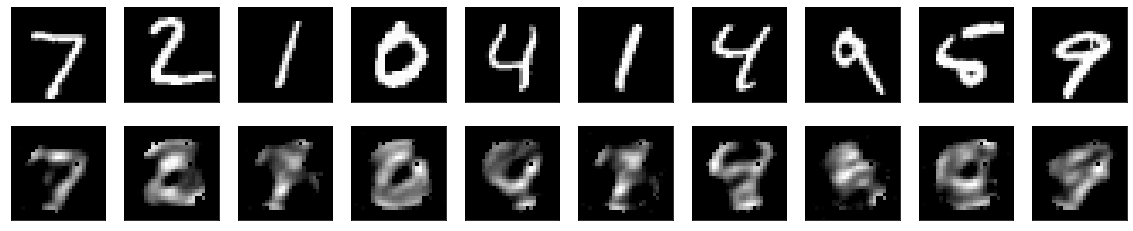

In [18]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

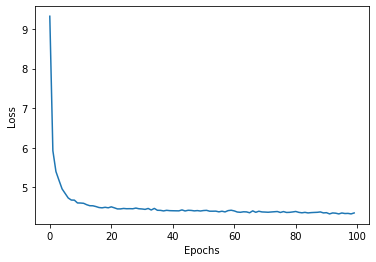

In [26]:
plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Prediction for 2 hidden layer model

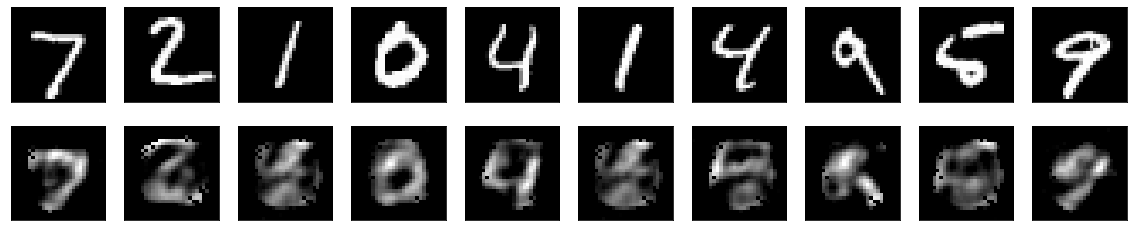

In [19]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model2(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

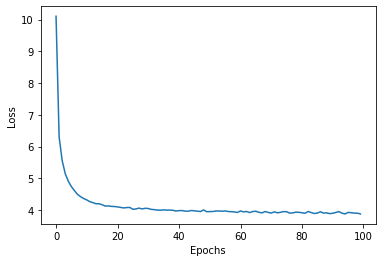

In [28]:
plt.plot(range(100), model2.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Predictions for 3 hidden layer Model

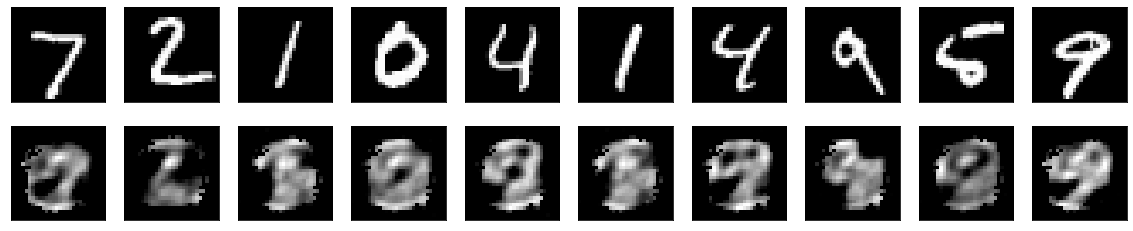

In [20]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model3(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

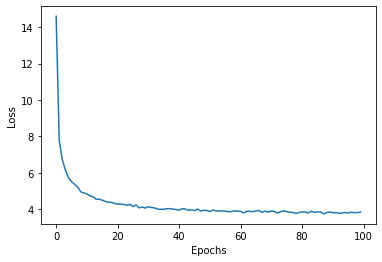

In [29]:
plt.plot(range(100), model3.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

From the Model Loss and Predictions, it can be noticed that the model with 3 hidden layer is performing the best. Since we are reducing the size of the layer. Since the dimensions decrease the data loss while decoding is also more. Thus, accuracy is better for 1 hidden layer model in this case.

## **CNN models**

Prepare Model

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

Prepare Data Set

In [0]:
# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

Fit Model

In [38]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2312 - val_loss: 0.2308
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2301 - val_loss: 0.2295
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2285 - val_loss: 0.2276
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2260 - val_loss: 0.2245
Epoch 5/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2219 - val_loss: 0.2192
Epoch 6/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2144 - val_loss: 0.2089
Epoch 7/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1990 - val_loss: 0.1868
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1678 - val_loss: 0.1494
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1353 - val_loss: 0.1280
Epoch 10/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1229 - val_loss: 0.1222

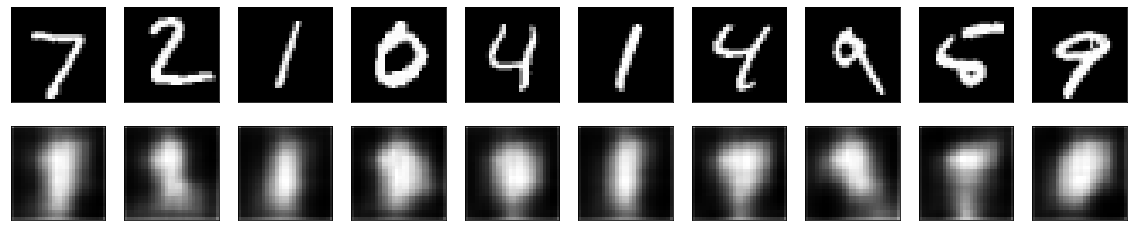

In [40]:
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()